In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
from ipywidgets import FloatSlider, interactive

In [2]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "maxlinreg", 
    "minlinreg", 
    "cca", 
    "lincka", 
    # "rbfcka",
]

In [3]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/johnmwu/contextual-corr-analysis/results13_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_neurons_d = {}
for network in network_l:
    num_neurons_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

# MaxCorr, MinCorr, MaxLinReg, MinLinReg

### Sorts

In [4]:
rk_methods = {"maxcorr", "mincorr", "maxlinreg", "minlinreg"}

In [5]:
neuron_sorts = {network: {} for network in network_l}
for network in network_l:
    for method in rk_methods:
        neuron_sorts[network][method] = res_d[method]["neuron_sort"][network]

In [6]:
# Set `rk_ar_d`, `rk_df_d`, `spearman_d`
rk_ar_d = {}
rk_df_d = {}
spearman_d = {}
for network in network_l:
    # rk_ar[method_ix, neuron] = rank
    # need to invert the permutation
    rk_ar = np.stack([
            [neuron_sorts[network][method].index(neuron) for neuron in range(len(neuron_sorts[network][method]))]
                      for method in rk_methods
    ]).T
    rk_df = pd.DataFrame(rk_ar, columns=list(rk_methods))
    
    rk_ar_d[network] = rk_ar
    rk_df_d[network] = rk_df
    spearman_d[network] = rk_df.corr()

In [7]:
for network in network_l:
    print(network)
    # print(rk_df_d[network])
    print(spearman_d[network])

gpt2_small_0
           minlinreg   maxcorr  maxlinreg   mincorr
minlinreg   1.000000  0.533632   0.379953  0.713411
maxcorr     0.533632  1.000000   0.568660  0.531189
maxlinreg   0.379953  0.568660   1.000000  0.248234
mincorr     0.713411  0.531189   0.248234  1.000000
gpt2_small_1
           minlinreg   maxcorr  maxlinreg   mincorr
minlinreg   1.000000  0.411131   0.540602  0.662026
maxcorr     0.411131  1.000000   0.925615  0.264348
maxlinreg   0.540602  0.925615   1.000000  0.359255
mincorr     0.662026  0.264348   0.359255  1.000000
gpt2_small_2
           minlinreg   maxcorr  maxlinreg   mincorr
minlinreg   1.000000  0.338684   0.388502  0.626054
maxcorr     0.338684  1.000000   0.964546  0.181669
maxlinreg   0.388502  0.964546   1.000000  0.230835
mincorr     0.626054  0.181669   0.230835  1.000000
gpt2_small_3
           minlinreg   maxcorr  maxlinreg   mincorr
minlinreg   1.000000  0.367246   0.413091  0.620974
maxcorr     0.367246  1.000000   0.975084  0.212768
maxlinreg   

### Distributions

In [8]:
for network in network_l:
    print("\n\n" + network + ":")
    for method in rk_methods:
        print("\n" + method)
        if method == "maxlinreg" or method == "minlinreg": 
            corr_df = pd.DataFrame(res_d[method]['pred_power'][network])
        else:
            corr_df = pd.DataFrame(res_d[method]['corrs'][network])
        
        print("\nmaxcounts")
        print(corr_df.idxmax(axis=1).value_counts())
        
        print("\nmincounts")
        print(corr_df.idxmin(axis=1).value_counts())
        
        print("\ncorr_df_pctl")
        corr_df_pctl = pd.DataFrame()
        corr_df_pctl["max"] = corr_df.max(axis=1)
        corr_df_pctl["min"] = corr_df.min(axis=1)
        corr_df_pctl["med"] = corr_df.median(axis=1)
        print(corr_df_pctl.rank().corr()) # spearman
        
#         corr_df.plot()
#         plt.xlabel("neuron (sorted order)")
#         plt.ylabel("correlation")
#         plt.show()
        
#         plt.hist(corr_ar.ravel(), bins=100)
#         plt.xlabel("correlation")
#         plt.ylabel("count")
#         plt.show()



gpt2_small_0:

minlinreg

maxcounts
gpt2_small_1           659
xlnet_large_cased_0     74
gpt2_small_2            24
xlnet_large_cased_1     11
dtype: int64

mincounts
gpt2_medium_23         656
xlnet_base_cased_0      50
xlnet_base_cased_11     26
gpt2_medium_22          24
xlnet_base_cased_10      4
gpt2_medium_21           3
xlnet_base_cased_9       3
xlnet_base_cased_5       1
xlnet_base_cased_8       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.379953  0.723561
min  0.379953  1.000000  0.660772
med  0.723561  0.660772  1.000000

maxcorr

maxcounts
gpt2_small_1            461
xlnet_large_cased_0      52
gpt2_small_2             49
xlnet_large_cased_1      34
gpt2_small_11            34
gpt2_small_3             28
xlnet_large_cased_2      25
gpt2_small_4              9
xlnet_base_cased_7        7
xlnet_base_cased_1        6
gpt2_small_10             5
xlnet_base_cased_0        5
xlnet_base_cased_3        4
xlnet_base_cased_11       4
xlnet_large_

gpt2_small_1    485
gpt2_small_3    282
gpt2_small_4      1
dtype: int64

mincounts
gpt2_medium_23          107
xlnet_large_cased_23     85
gpt2_medium_22           67
gpt2_medium_20           45
gpt2_medium_12           41
gpt2_medium_21           38
gpt2_medium_14           37
gpt2_medium_15           36
gpt2_medium_17           36
gpt2_medium_18           35
gpt2_medium_13           30
gpt2_medium_16           29
gpt2_medium_19           27
gpt2_medium_10           22
gpt2_medium_11           16
gpt2_medium_7            15
gpt2_medium_9            10
gpt2_medium_8            10
xlnet_base_cased_10       9
xlnet_large_cased_22      8
xlnet_base_cased_11       8
xlnet_base_cased_0        7
gpt2_medium_6             6
gpt2_medium_0             5
xlnet_base_cased_5        5
xlnet_base_cased_4        4
xlnet_base_cased_1        4
xlnet_base_cased_3        3
xlnet_large_cased_13      3
xlnet_large_cased_18      3
gpt2_medium_5             3
xlnet_base_cased_8        2
xlnet_large_cased_20


maxcounts
gpt2_small_6    472
gpt2_small_4    295
gpt2_small_7      1
dtype: int64

mincounts
gpt2_medium_23          128
gpt2_medium_22           66
gpt2_medium_20           60
gpt2_medium_21           46
gpt2_medium_15           45
gpt2_medium_19           42
gpt2_medium_16           40
gpt2_medium_14           38
gpt2_medium_17           37
gpt2_medium_18           28
xlnet_large_cased_23     28
gpt2_medium_12           28
gpt2_medium_10           25
gpt2_medium_13           23
gpt2_medium_11           15
gpt2_medium_9            13
gpt2_medium_6            11
gpt2_medium_8            10
gpt2_medium_7             8
xlnet_base_cased_0        7
xlnet_base_cased_8        7
xlnet_base_cased_9        7
xlnet_base_cased_4        6
xlnet_base_cased_10       6
xlnet_base_cased_7        6
xlnet_large_cased_20      6
xlnet_base_cased_1        5
xlnet_base_cased_11       4
gpt2_medium_4             4
gpt2_medium_3             3
xlnet_base_cased_5        3
gpt2_medium_5             3
xlnet_bas

          max       min       med
max  1.000000  0.549915  0.738553
min  0.549915  1.000000  0.768884
med  0.738553  0.768884  1.000000

mincorr

maxcounts
gpt2_small_7    657
gpt2_small_9    108
gpt2_small_4      2
gpt2_small_6      1
dtype: int64

mincounts
gpt2_medium_23          107
gpt2_medium_22           59
gpt2_medium_21           48
gpt2_medium_19           45
gpt2_medium_20           44
gpt2_medium_18           43
gpt2_medium_14           37
gpt2_medium_13           35
gpt2_medium_12           35
gpt2_medium_17           31
gpt2_medium_16           31
gpt2_medium_8            24
gpt2_medium_15           24
gpt2_medium_11           22
xlnet_large_cased_23     20
gpt2_medium_9            18
gpt2_medium_10           17
gpt2_medium_0            17
xlnet_base_cased_0       14
xlnet_base_cased_8       14
xlnet_base_cased_11      10
gpt2_medium_6             8
xlnet_base_cased_9        8
gpt2_medium_4             7
gpt2_medium_7             7
xlnet_base_cased_6        6
xlnet_base_c

          max       min       med
max  1.000000  0.650860  0.717395
min  0.650860  1.000000  0.738716
med  0.717395  0.738716  1.000000

mincorr

maxcounts
gpt2_small_10    766
gpt2_small_4       1
gpt2_small_0       1
dtype: int64

mincounts
gpt2_medium_23          81
gpt2_medium_22          54
gpt2_medium_0           48
gpt2_medium_21          43
gpt2_medium_16          42
gpt2_medium_14          37
gpt2_medium_15          33
gpt2_medium_13          31
gpt2_medium_18          31
gpt2_medium_17          30
gpt2_medium_20          27
gpt2_medium_10          25
gpt2_medium_12          23
gpt2_medium_19          21
gpt2_medium_8           21
gpt2_medium_9           19
gpt2_medium_11          18
xlnet_base_cased_10     16
xlnet_base_cased_9      15
gpt2_medium_6           14
xlnet_base_cased_8      12
xlnet_base_cased_0      12
xlnet_base_cased_4      11
xlnet_base_cased_5      10
xlnet_base_cased_11      9
xlnet_base_cased_1       9
gpt2_medium_7            9
gpt2_medium_3            9
x

          max       min       med
max  1.000000  0.247270  0.722143
min  0.247270  1.000000  0.657432
med  0.722143  0.657432  1.000000

maxcorr

maxcounts
xlnet_large_cased_4    686
xlnet_large_cased_6    337
xlnet_large_cased_0      1
dtype: int64

mincounts
gpt2_medium_23         158
gpt2_medium_22          92
gpt2_medium_21          62
gpt2_medium_18          56
gpt2_medium_19          56
gpt2_medium_17          56
gpt2_medium_16          49
gpt2_medium_14          49
gpt2_medium_10          46
gpt2_medium_15          45
gpt2_medium_12          44
gpt2_medium_13          42
gpt2_medium_20          40
gpt2_medium_11          32
gpt2_medium_8           24
gpt2_medium_6           24
gpt2_medium_9           24
gpt2_medium_7           21
gpt2_medium_4           14
gpt2_medium_5           13
gpt2_medium_0           13
xlnet_base_cased_11     11
gpt2_medium_3           11
xlnet_base_cased_4       5
xlnet_base_cased_0       5
gpt2_medium_2            4
xlnet_base_cased_6       4
xlnet_base

          max       min       med
max  1.000000  0.081090  0.313995
min  0.081090  1.000000  0.391733
med  0.313995  0.391733  1.000000


xlnet_large_cased_8:

minlinreg

maxcounts
xlnet_large_cased_9    1021
xlnet_large_cased_7       3
dtype: int64

mincounts
gpt2_medium_23         684
gpt2_medium_22         165
gpt2_medium_21          54
xlnet_base_cased_0      41
gpt2_medium_20          25
gpt2_medium_18          19
gpt2_medium_19          15
gpt2_medium_17           8
gpt2_medium_16           6
gpt2_medium_14           2
xlnet_base_cased_1       2
xlnet_base_cased_11      1
gpt2_medium_15           1
gpt2_medium_10           1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.214031  0.779722
min  0.214031  1.000000  0.583255
med  0.779722  0.583255  1.000000

maxcorr

maxcounts
xlnet_large_cased_9    861
xlnet_large_cased_7    163
dtype: int64

mincounts
gpt2_medium_23         115
gpt2_medium_0           65
gpt2_medium_22          63
gpt2_medium_17     

          max       min       med
max  1.000000  0.235216  0.784263
min  0.235216  1.000000  0.611042
med  0.784263  0.611042  1.000000

mincorr

maxcounts
xlnet_large_cased_9     787
xlnet_large_cased_11    237
dtype: int64

mincounts
gpt2_medium_23         115
gpt2_medium_22          71
gpt2_medium_0           58
gpt2_medium_20          53
gpt2_medium_17          48
gpt2_medium_13          47
gpt2_medium_18          46
gpt2_medium_14          45
gpt2_medium_15          39
gpt2_medium_12          36
gpt2_medium_11          35
gpt2_medium_19          34
gpt2_medium_21          33
gpt2_medium_16          33
gpt2_medium_7           30
gpt2_medium_6           24
gpt2_medium_9           23
gpt2_medium_10          23
xlnet_base_cased_10     23
gpt2_medium_8           19
xlnet_base_cased_5      19
gpt2_medium_5           19
xlnet_base_cased_11     18
xlnet_base_cased_8      17
xlnet_base_cased_0      16
xlnet_base_cased_9      14
xlnet_base_cased_6      13
xlnet_base_cased_2      13
xlnet_ba

xlnet_large_cased_14    747
xlnet_large_cased_12    277
dtype: int64

mincounts
gpt2_medium_23         108
gpt2_medium_22          73
gpt2_medium_16          51
gpt2_medium_21          50
gpt2_medium_0           47
gpt2_medium_17          46
gpt2_medium_13          44
gpt2_medium_14          44
gpt2_medium_20          41
gpt2_medium_15          37
gpt2_medium_19          35
gpt2_medium_12          32
gpt2_medium_11          31
gpt2_medium_9           29
gpt2_medium_10          28
xlnet_base_cased_11     27
gpt2_medium_8           25
gpt2_medium_18          24
xlnet_base_cased_10     24
xlnet_base_cased_0      23
gpt2_medium_7           23
gpt2_medium_6           22
xlnet_base_cased_5      18
gpt2_medium_5           17
xlnet_base_cased_6      15
xlnet_base_cased_1      14
xlnet_base_cased_2      13
xlnet_base_cased_7      13
xlnet_base_cased_4      12
xlnet_base_cased_8      10
gpt2_medium_4           10
gpt2_medium_2            9
xlnet_base_cased_9       9
xlnet_base_cased_3       8
gp

          max       min       med
max  1.000000  0.133019  0.400179
min  0.133019  1.000000  0.426326
med  0.400179  0.426326  1.000000


xlnet_large_cased_16:

minlinreg

maxcounts
xlnet_large_cased_17    946
xlnet_large_cased_15     78
dtype: int64

mincounts
gpt2_medium_23        511
gpt2_medium_22        159
xlnet_base_cased_0    141
gpt2_medium_21         66
gpt2_medium_20         39
gpt2_medium_19         26
gpt2_medium_18         21
gpt2_medium_17         16
gpt2_medium_16         12
gpt2_medium_13          7
gpt2_medium_14          6
gpt2_medium_15          6
gpt2_medium_12          3
xlnet_base_cased_1      3
xlnet_base_cased_2      1
gpt2_medium_11          1
xlnet_base_cased_3      1
xlnet_base_cased_6      1
gpt2_medium_8           1
gpt2_medium_10          1
gpt2_medium_5           1
gpt2_medium_7           1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.382188  0.760612
min  0.382188  1.000000  0.700880
med  0.760612  0.700880  1.000000

ma

          max       min       med
max  1.000000  0.324997  0.689562
min  0.324997  1.000000  0.699919
med  0.689562  0.699919  1.000000

mincorr

maxcounts
xlnet_large_cased_19    892
xlnet_large_cased_17    132
dtype: int64

mincounts
gpt2_medium_23         104
gpt2_medium_0           64
gpt2_medium_16          52
gpt2_medium_17          50
gpt2_medium_14          48
gpt2_medium_22          47
gpt2_medium_15          46
gpt2_medium_12          43
gpt2_medium_19          42
gpt2_medium_20          41
gpt2_medium_18          41
gpt2_medium_21          39
gpt2_medium_7           35
gpt2_medium_13          35
gpt2_medium_9           30
gpt2_medium_10          30
gpt2_medium_11          28
gpt2_medium_5           25
gpt2_medium_4           22
gpt2_medium_8           22
gpt2_medium_6           21
gpt2_medium_3           16
xlnet_base_cased_11     15
xlnet_base_cased_8      14
gpt2_medium_2           13
xlnet_base_cased_9      13
xlnet_base_cased_10     12
xlnet_base_cased_4      12
xlnet_ba

          max       min       med
max  1.000000  0.139075  0.318522
min  0.139075  1.000000  0.304242
med  0.318522  0.304242  1.000000

maxlinreg

maxcounts
xlnet_large_cased_22    1023
xlnet_large_cased_20       1
dtype: int64

mincounts
gpt2_medium_23        662
gpt2_medium_22        168
gpt2_medium_21         69
gpt2_medium_20         46
gpt2_medium_19         22
gpt2_medium_18         15
gpt2_medium_17         15
gpt2_medium_16          9
xlnet_base_cased_0      6
gpt2_medium_14          3
gpt2_medium_13          3
gpt2_medium_11          2
gpt2_medium_15          2
gpt2_medium_7           1
gpt2_medium_4           1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.424575  0.614771
min  0.424575  1.000000  0.759657
med  0.614771  0.759657  1.000000

mincorr

maxcounts
xlnet_large_cased_20    594
xlnet_large_cased_22    429
xlnet_large_cased_0       1
dtype: int64

mincounts
gpt2_medium_23         108
gpt2_medium_22          70
gpt2_medium_19          6

          max       min       med
max  1.000000  0.133221 -0.005389
min  0.133221  1.000000  0.906247
med -0.005389  0.906247  1.000000

maxcorr

maxcounts
gpt2_small_0            366
gpt2_medium_1            89
xlnet_large_cased_1      80
xlnet_large_cased_2      61
xlnet_base_cased_3       33
xlnet_base_cased_5       30
xlnet_base_cased_2       30
xlnet_base_cased_7       25
xlnet_base_cased_4       25
xlnet_base_cased_0       23
xlnet_base_cased_6       22
xlnet_base_cased_1       22
xlnet_base_cased_11      21
gpt2_small_11            21
gpt2_medium_2            20
xlnet_base_cased_8       19
xlnet_base_cased_10      18
gpt2_small_1             18
xlnet_base_cased_9       17
gpt2_small_2             12
xlnet_large_cased_5      12
xlnet_large_cased_4       9
gpt2_small_3              8
xlnet_large_cased_6       6
xlnet_large_cased_3       6
gpt2_medium_3             5
gpt2_small_10             4
gpt2_small_9              3
gpt2_small_7              3
gpt2_small_6              3
gpt2

          max       min       med
max  1.000000  0.349258  0.396142
min  0.349258  1.000000  0.641575
med  0.396142  0.641575  1.000000

maxlinreg

maxcounts
gpt2_medium_3    1024
dtype: int64

mincounts
xlnet_base_cased_0      1021
xlnet_large_cased_23       2
xlnet_large_cased_0        1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.194040  0.778035
min  0.194040  1.000000  0.290602
med  0.778035  0.290602  1.000000

mincorr

maxcounts
gpt2_medium_3    1014
gpt2_medium_1      10
dtype: int64

mincounts
xlnet_large_cased_23    457
xlnet_large_cased_0      79
xlnet_large_cased_1      56
xlnet_base_cased_0       47
xlnet_large_cased_2      40
xlnet_base_cased_3       33
xlnet_base_cased_4       33
xlnet_base_cased_1       31
xlnet_large_cased_22     29
xlnet_base_cased_2       26
xlnet_base_cased_6       24
xlnet_base_cased_5       23
xlnet_base_cased_10      21
xlnet_base_cased_8       21
xlnet_large_cased_3      20
xlnet_base_cased_11      19
xlnet_base

xlnet_large_cased_23    300
xlnet_base_cased_0       91
xlnet_large_cased_0      81
xlnet_large_cased_1      77
xlnet_large_cased_2      69
xlnet_base_cased_2       50
xlnet_base_cased_4       42
xlnet_base_cased_3       40
xlnet_base_cased_5       38
xlnet_base_cased_1       36
xlnet_base_cased_6       35
xlnet_base_cased_9       23
xlnet_base_cased_8       21
xlnet_base_cased_10      20
xlnet_large_cased_22     19
xlnet_base_cased_7       19
xlnet_large_cased_21     14
xlnet_large_cased_3      13
xlnet_base_cased_11      11
xlnet_large_cased_19      4
xlnet_large_cased_18      4
xlnet_large_cased_20      4
xlnet_large_cased_10      2
xlnet_large_cased_17      2
xlnet_large_cased_16      2
xlnet_large_cased_9       2
xlnet_large_cased_4       2
xlnet_large_cased_6       1
xlnet_large_cased_11      1
xlnet_large_cased_12      1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.341391  0.432718
min  0.341391  1.000000  0.563310
med  0.432718  0.563310  1.0000

          max       min       med
max  1.000000  0.305039  0.394978
min  0.305039  1.000000  0.576943
med  0.394978  0.576943  1.000000


gpt2_medium_10:

minlinreg

maxcounts
gpt2_medium_11    1006
gpt2_medium_9       18
dtype: int64

mincounts
xlnet_base_cased_0     1016
xlnet_large_cased_0       8
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.232770  0.635475
min  0.232770  1.000000  0.396104
med  0.635475  0.396104  1.000000

maxcorr

maxcounts
gpt2_medium_11    663
gpt2_medium_9     361
dtype: int64

mincounts
xlnet_large_cased_23    255
xlnet_base_cased_0      102
xlnet_large_cased_1      92
xlnet_large_cased_0      72
xlnet_base_cased_1       65
xlnet_large_cased_2      58
xlnet_base_cased_2       55
xlnet_base_cased_4       52
xlnet_base_cased_3       37
xlnet_base_cased_5       34
xlnet_base_cased_9       28
xlnet_base_cased_6       28
xlnet_base_cased_8       26
xlnet_base_cased_7       21
xlnet_large_cased_22     20
xlnet_large_cased_3      19

gpt2_medium_16    940
gpt2_medium_14     84
dtype: int64

mincounts
xlnet_base_cased_0     1020
xlnet_large_cased_0       4
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.256144  0.634749
min  0.256144  1.000000  0.416889
med  0.634749  0.416889  1.000000

maxcorr

maxcounts
gpt2_medium_16    605
gpt2_medium_14    419
dtype: int64

mincounts
xlnet_large_cased_23    221
xlnet_large_cased_1     116
xlnet_base_cased_0      109
xlnet_large_cased_2      76
xlnet_large_cased_0      62
xlnet_base_cased_1       57
xlnet_base_cased_4       56
xlnet_base_cased_2       51
xlnet_base_cased_3       46
xlnet_base_cased_5       32
xlnet_base_cased_6       27
xlnet_base_cased_8       26
xlnet_base_cased_10      26
xlnet_base_cased_9       25
xlnet_base_cased_7       20
xlnet_large_cased_3      18
xlnet_large_cased_22     16
xlnet_base_cased_11      15
xlnet_large_cased_4       6
xlnet_large_cased_21      6
xlnet_large_cased_11      3
xlnet_large_cased_13      2
xlnet_lar

xlnet_large_cased_23    188
xlnet_base_cased_0      132
xlnet_large_cased_2      90
xlnet_large_cased_1      82
xlnet_large_cased_0      78
xlnet_base_cased_1       66
xlnet_base_cased_2       57
xlnet_base_cased_3       45
xlnet_base_cased_4       42
xlnet_base_cased_5       39
xlnet_base_cased_6       38
xlnet_base_cased_8       32
xlnet_base_cased_7       25
xlnet_base_cased_9       23
xlnet_large_cased_3      18
xlnet_base_cased_10      17
xlnet_base_cased_11      15
xlnet_large_cased_22     11
xlnet_large_cased_21      8
xlnet_large_cased_20      6
xlnet_large_cased_14      2
xlnet_large_cased_5       2
xlnet_large_cased_17      2
xlnet_large_cased_19      1
xlnet_large_cased_18      1
xlnet_large_cased_4       1
gpt2_small_0              1
xlnet_large_cased_10      1
xlnet_large_cased_8       1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.298815  0.357983
min  0.298815  1.000000  0.577239
med  0.357983  0.577239  1.000000

maxlinreg

maxcounts
gpt

          max       min       med
max  1.000000  0.839924  0.865599
min  0.839924  1.000000  0.945934
med  0.865599  0.945934  1.000000

mincorr

maxcounts
xlnet_base_cased_2    387
xlnet_base_cased_0    381
dtype: int64

mincounts
gpt2_medium_23          193
gpt2_medium_22          120
gpt2_medium_21           73
gpt2_medium_20           62
gpt2_medium_19           49
gpt2_medium_18           48
gpt2_medium_17           33
gpt2_medium_14           31
gpt2_medium_16           28
gpt2_medium_15           25
gpt2_medium_13           21
gpt2_medium_12           19
gpt2_medium_11           17
gpt2_medium_8            13
gpt2_medium_10           11
gpt2_medium_9             9
gpt2_medium_7             7
xlnet_large_cased_23      3
gpt2_medium_6             2
gpt2_medium_5             2
xlnet_large_cased_18      1
gpt2_medium_4             1
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.504291  0.553732
min  0.504291  1.000000  0.629228
med  0.553732  0.629228

          max       min       med
max  1.000000  0.410007  0.446666
min  0.410007  1.000000  0.586065
med  0.446666  0.586065  1.000000

maxlinreg

maxcounts
xlnet_base_cased_6    675
xlnet_base_cased_8     93
dtype: int64

mincounts
gpt2_medium_23          749
gpt2_medium_22           12
xlnet_large_cased_23      4
gpt2_medium_21            3
dtype: int64

corr_df_pctl
          max       min       med
max  1.000000  0.787044  0.824911
min  0.787044  1.000000  0.946896
med  0.824911  0.946896  1.000000

mincorr

maxcounts
xlnet_base_cased_6    427
xlnet_base_cased_8    341
dtype: int64

mincounts
gpt2_medium_23          175
gpt2_medium_22          102
gpt2_medium_21           70
gpt2_medium_20           64
gpt2_medium_19           53
gpt2_medium_17           45
gpt2_medium_15           45
gpt2_medium_18           41
gpt2_medium_16           27
gpt2_medium_12           21
gpt2_medium_13           20
gpt2_medium_11           19
gpt2_medium_14           19
gpt2_medium_10           17
gpt

# LinCKA

In [9]:
lincka_df = pd.DataFrame(res_d['lincka']['similarities'])
lincka_df = lincka_df.reindex(lincka_df.columns)

In [10]:
# network = "elmo_original_0"
# lincka_df.sort_values(by=network)[network]

KeyError: 'elmo_original_0'

# RBFCKA

In [ ]:
# rbfcka_d = torch.load(res_fname["rbfcka"])
# rbfcka_df = pd.DataFrame(rbfcka_d)

In [ ]:
# rbfcka_df

In [ ]:
# network = "bert_large_cased_0"
# rbfcka_df.sort_values(by=network)[network]

# CCA

In [11]:
sv_corrs = res_d['cca']['corrs']
sv_similarities = res_d['cca']['sv_similarities']
pw_similarities = res_d['cca']['pw_similarities']
pw_corrs = res_d['cca']['pw_corrs']
pw_alignments = res_d['cca']['pw_alignments']

In [12]:
sv_sim_df = pd.DataFrame(sv_similarities)
sv_sim_df = sv_sim_df.reindex(sv_sim_df.columns)
pw_sim_df = pd.DataFrame(pw_similarities)
pw_sim_df = pw_sim_df.reindex(pw_sim_df.columns)
sv_corrs_df = pd.DataFrame(sv_corrs)
sv_corrs_df = sv_corrs_df.reindex(sv_corrs_df.columns)
pw_corrs_df = pd.DataFrame(pw_corrs)
pw_corrs_df = pw_corrs_df.reindex(pw_corrs_df.columns)
pw_alignments_df = pd.DataFrame(pw_alignments)
pw_alignments_df = pw_alignments_df.reindex(pw_alignments_df.columns)
max_corrs_df = sv_corrs_df.applymap(lambda t: float('nan') if type(t) is float else t.max().item())

### SVCCA

In [13]:
# network = "elmo_original_0"
# sv_sim_df.sort_values(by=network)[network]

KeyError: 'elmo_original_0'

### PWCCA

In [ ]:
# network = "elmo_original_0"
# pw_sim_df.sort_values(by=network)[network]

# Heatmaps

In [14]:
plt.rcParams["figure.figsize"] = (20,15)

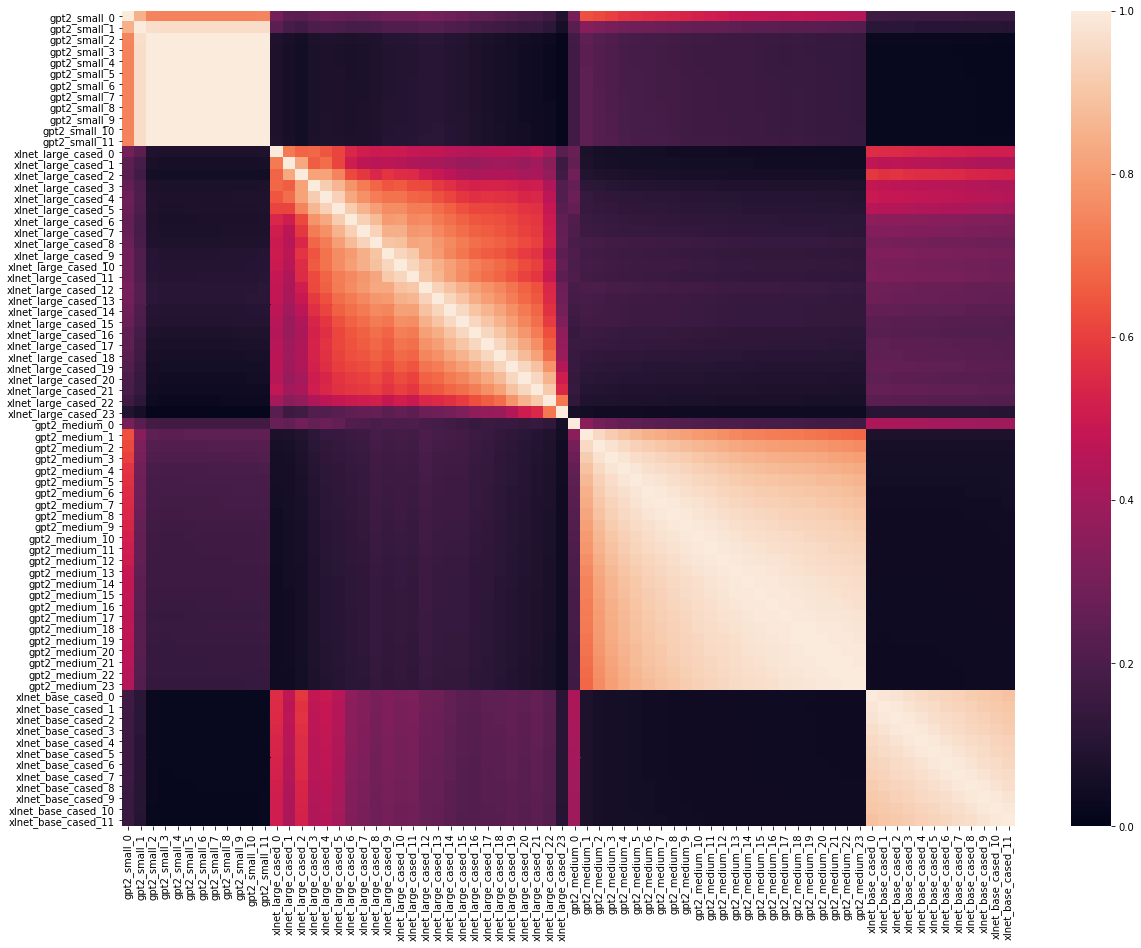

In [15]:
# lincka
sns.heatmap(lincka_df.fillna(1), vmin=0, vmax=1)

In [16]:
def corrs_update(fl, corr_df, fname_prefix, weights_df=None):
    fname = "{0}{1:.2f}.png".format(fname_prefix, fl)
    try:
        plt.imshow(fname)
    except:
        if weights_df is None: # eg. svcca, don't need to do special division
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else 
                                              t[:int(fl*len(t))].mean())
        else:
            denominator_df = weights_df.applymap(lambda t: float('nan') if type(t) is float else 
                                                             t[:int(fl*len(t))].sum())
            df = corr_df.applymap(lambda t: float('nan') if type(t) is float else
                                            t[:int(fl*len(t))].sum())
            df /= denominator_df
        sns.heatmap(df.fillna(1), vmin=0, vmax=1)
        # sns.heatmap(df.fillna(1), )
        plt.savefig(fname)
    
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

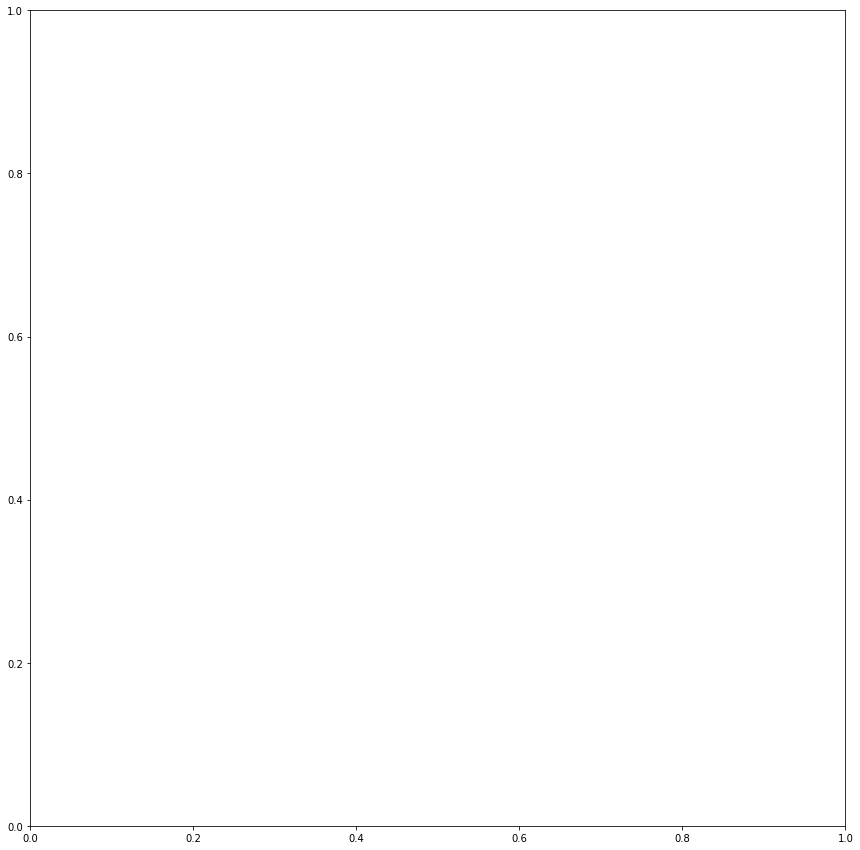

In [17]:
# interactive updates
def pw_update(fl):
    corrs_update(fl, pw_corrs_df, "temp_pw_", weights_df=pw_alignments_df)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(pw_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

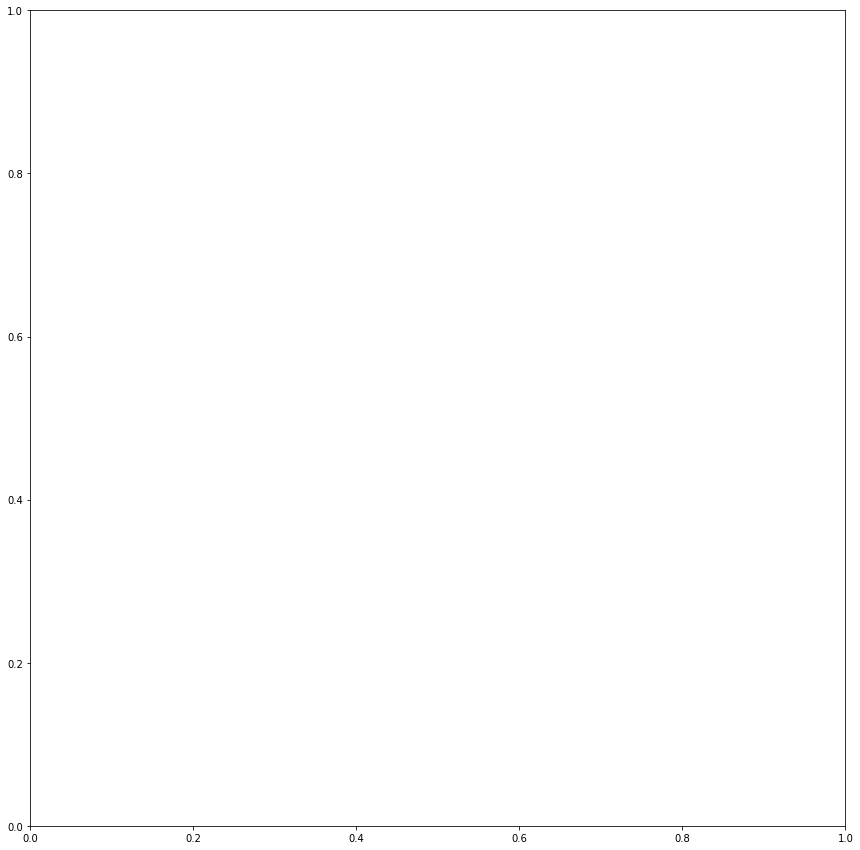

In [18]:
# interactive updates
def sv_update(fl):
    corrs_update(fl, sv_corrs_df, "temp_pw_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(sv_update, fl=slider)

In [19]:
# interactive for maxmincorr
maxmin_corrs = res_d['maxcorr']['corrs']
maxmin_corrs_df = pd.DataFrame(maxmin_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
maxmin_corrs_df = maxmin_corrs_df.reindex(maxmin_corrs_df.columns)
def maxmincorr_update(fl):
    corrs_update(fl, maxmin_corrs_df, "temp_maxmincorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(maxmincorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [24]:
str.join?

In [20]:
# interactive for linregcorr
linreg_corrs = res_d['maxlinreg']['pred_power']
linreg_corrs_df = pd.DataFrame(linreg_corrs).applymap(lambda a: float('nan') if type(a) is float else -np.sort(-a)) # np sort has no reverse keyword
linreg_corrs_df = linreg_corrs_df.reindex(linreg_corrs_df.columns)
def linregcorr_update(fl):
    corrs_update(fl, linreg_corrs_df, "temp_linregcorr_", weights_df=None)
slider = FloatSlider(min=0, max=1, step=0.1)
interactive(linregcorr_update, fl=slider)

interactive(children=(FloatSlider(value=0.0, description='fl', max=1.0), Output()), _dom_classes=('widget-inte…

In [21]:
# rbfcka
# sns.heatmap(rbfcka_df.reindex(rbfcka_df.columns).fillna(1), vmin=0, vmax=1)

In [22]:
# comparing models
# use lincka
model1 = "elmo"
model2 = "elmo"
cols = [s for s in lincka_df.columns if s.find(model1) >= 0]
rows = [s for s in lincka_df.columns if s.find(model2) >= 0]

In [23]:
df = lincka_df.loc[rows, cols]

sns.heatmap(df, xticklabels=range(len(df.columns)), yticklabels=range(len(df.index)), annot=True)
plt.xlabel(model1)
plt.ylabel(model2)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity